<a href="https://colab.research.google.com/github/meghmodi2810/Machine-Learning-Projects/blob/main/MNIST_DatasetAnalysis_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dataset = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = dataset.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [14]:
X_train.shape

(60000, 28, 28)

In [18]:
classes = np.unique(y_train)

In [34]:
print(classes)

[0 1 2 3 4 5 6 7 8 9]


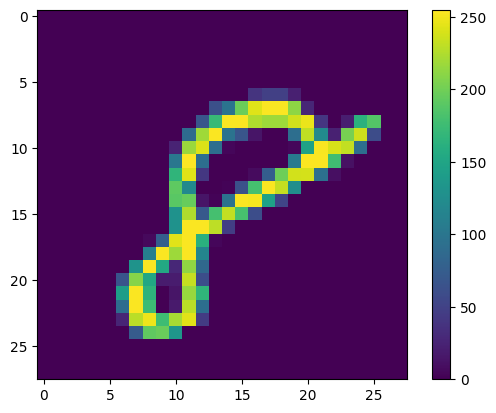

In [38]:
plt.figure()
plt.imshow(X_train[-1])
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [40]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [41]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [42]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2405 - accuracy: 0.9292
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1044 - accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0759 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0591 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0452 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0376 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0313 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0271 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9760
97.60000109672546


In [44]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [46]:
print(predictions[0])
np.argmax(predictions[0])

[5.4721561e-12 5.0071774e-12 2.0881552e-11 7.7762314e-07 4.6456955e-14
 4.2657366e-12 3.3375410e-20 9.9999851e-01 3.7128859e-12 5.5257607e-07]


7

In [53]:
len(X_test)

10000

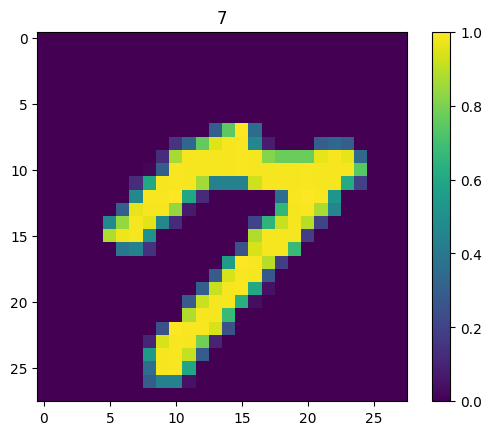

In [54]:
n = 8931 # Item to predict as per argmax

plt.figure()
plt.imshow(X_test[n])
plt.colorbar()
plt.title(classes[np.argmax(predictions[n])])
plt.grid(False)
plt.show()

Pick a number (0–9999): 1823


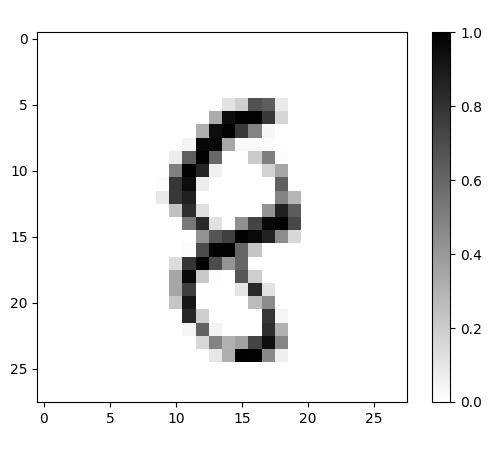

In [60]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    prediction = model.predict(np.array([image]), verbose=0)  # Add verbose=0 to suppress logs
    predicted_class = str(np.argmax(prediction))
    show_image(image, str(correct_label), predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number (0–9999): ")
        if num.isdigit():
            num = int(num)
            if 0 <= num < len(X_test):
                return num
        print("Try again...")

# Usage
num = get_number()
image = X_test[num]
label = y_test[num]
predict(model, image, label)
